# Lab: Gradient Descent and Stochastic Gradient Descent

Import first all these librairies   

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
import math as math
import seaborn as sns # for nicer plots
sns.set_theme()

In this lab, we aim to apply GD and SGD to some particular functions

## I. Application on a one-dimensional case

We fist start with applying GD to the one-dimensional function: 
$$
f_1: w \mapsto w^2 -w/2+1- \log[1+\exp(w/2+1)].
$$


Q1. First plot this function on $[-1,1]$.

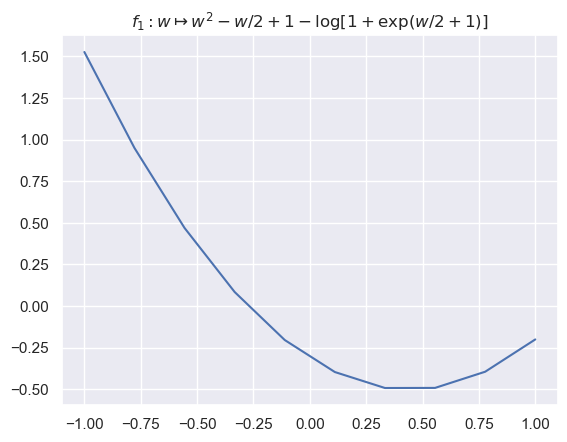

In [3]:
def f1(w):
    return w**2 - w/2 + 1 - np.log(1+ np.exp (w/2+1))

x = np.linspace(-1,1,10)
y = f1(x)

plt.title('$f_1: w \mapsto w^2 -w/2+1- \log[1+\exp(w/2+1)]$')
plt.plot(x,y);

Q2. Compute the derivative of $f_1$ and implement this  function.

/var/folders/cg/ltgc1bw91_q800mfcy5vfvkw0000gn/T/ipykernel_50219/4275136580.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(f1, x)


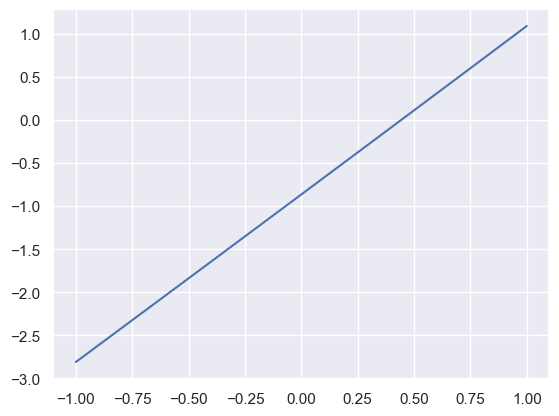

In [4]:
def f1_diff(x):
    return derivative(f1, x)

y1 = f1_diff(x)

plt.plot(x,y1);

Q3. Is $f_1$ convex? 

Yes

Q4. We aim to apply GD to $f_1$. Implement a function which takes as input 
- the derivative of the function to minimize
- an initial condition
- a stepsize/learning rate 
- a number of iterations

and ouputs

- the list of iterates of GD
- the list of the evaluations of the derivative of the function at the iterates

In [5]:
def gradient_descent(gradient, start=1, learn_rate=0.3, n_iter=50):
    iterates = []
    evalderiv = []
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        vector += diff
        iterates.append(vector)
        evalderiv.append(diff)
    return iterates, evalderiv

Q5. Apply GD to $f_1$ and plot the iterates and the functions at the iterates.

In [6]:
(gradient_descent(f1_diff,1))

/var/folders/cg/ltgc1bw91_q800mfcy5vfvkw0000gn/T/ipykernel_50219/4275136580.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(f1, x)


([0.6720499485287125,
  0.5370013148461932,
  0.48128060545765416,
  0.4582720441326074,
  0.44876808262525336,
  0.4448418272200113,
  0.443219730896186,
  0.44254956128291306,
  0.44227267786017493,
  0.44215828184833744,
  0.44211101838764305,
  0.44209149116655283,
  0.4420834233597618,
  0.44208009008906396,
  0.4420787129249401,
  0.4420781439399302,
  0.44207790885978365,
  0.44207781173477245,
  0.4420777716068928,
  0.44207775502777785,
  0.4420777481780002,
  0.4420777453479665,
  0.44207774417871826,
  0.44207774369563513,
  0.44207774349604595,
  0.4420777434135843,
  0.44207774337951466,
  0.4420777433654386,
  0.44207774335962297,
  0.44207774335722017,
  0.4420777433562275,
  0.4420777433558173,
  0.44207774335564787,
  0.4420777433555778,
  0.4420777433555489,
  0.44207774335553685,
  0.44207774335553196,
  0.4420777433555299,
  0.44207774335552913,
  0.4420777433555288,
  0.4420777433555287,
  0.4420777433555286,
  0.4420777433555286,
  0.4420777433555286,
  0.44207774

/var/folders/cg/ltgc1bw91_q800mfcy5vfvkw0000gn/T/ipykernel_50219/4275136580.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(f1, x)


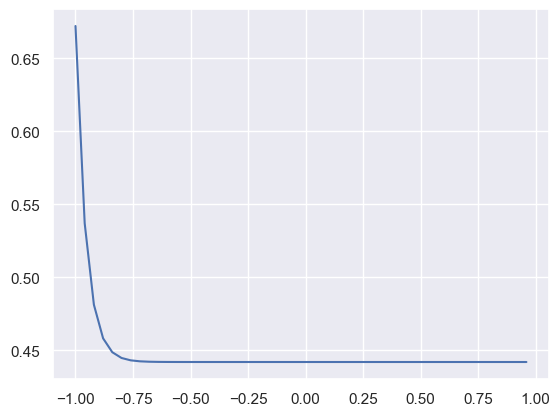

In [7]:
plt.plot(np.arange(-1,1,2/50),gradient_descent(f1_diff,1)[0]);

Q6. (Optional) Estimate the rate of convergence of GD for $f_1$. To this end, only 100 hundred iterations are sufficient starting from $1$.

We now consider the one-dimensional function: 
$$
f_2 : w \mapsto w^2 + \cos(2\pi w) -\log(1+4 w^2) +w.
$$
Q7. First plot this function on $[-3,3]$.

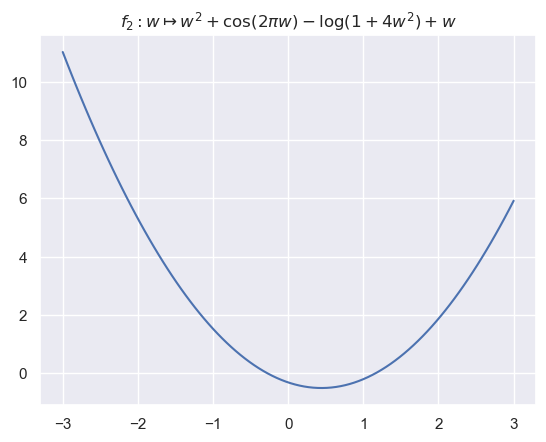

In [9]:
def f2(w):
    y = w**2 + np.cos(2*math.pi*w) - np.log(1 + 4*w**2) + w
    return y

x = np.linspace(-3,3,100)
y = f1(x)

plt.title('$f_2 : w \mapsto w^2 + \cos(2\pi w) -\log(1+4 w^2) +w$')
plt.plot(x,y);

Q8. Is this function is convex?

Yes

Q9. Apply GD using different initialization and plot the evaluation of $f_2$ at the resulting iterates.

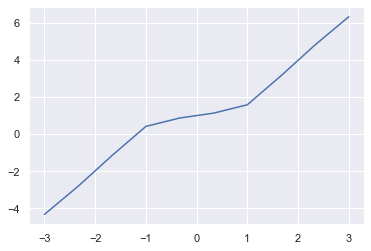

In [8]:
# Defining the derivative 

def f2_diff(x):
    return derivative (f2,x)

y1 = f2_diff(x)

plt.plot(x,y1);

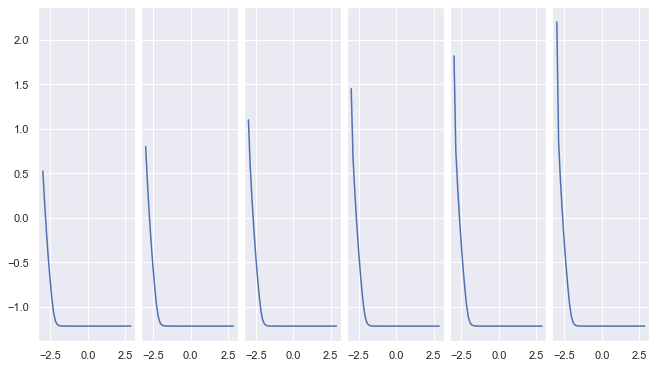

In [9]:
# Plotting the GD for different initialization vectors

x = np.arange(-3,3,6/50)

fig, axes = plt.subplots(1,6,sharey = True, constrained_layout = True, figsize = (9,5))
initialization_vectors = [1, 2, 3, 4, 5, 6]
for initialization_vector, ax in zip(initialization_vectors, axes):
    ax.plot(x, gradient_descent(f2_diff, initialization_vector)[0])

## II. Application on the Rosenbrock function

In this part, we consider the function
$$
f_3 : w \mapsto (w_1-1)^2 + 100(w_1^2-w_2)^2 \, ,
$$
called the Rosenbrock function.

Q10. Plot the contour lines of this function.

/var/folders/my/tj47h9c57nzcwpmj3b5tlxqw0000gn/T/ipykernel_3719/2177848308.py:18: UserWarning: The following kwargs were not used by contour: 'figsize'
  plt.contour(X,Y,Z,levels, figsize=(12,7))


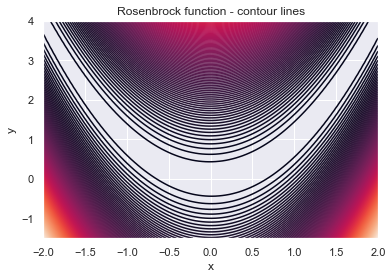

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#Plot of Rosenbrock's banana function: f(x,y)=(1-x)^2+100(y-x^2)^2

rosenbrockfunction = lambda x,y: (1-x)**2+100*(y-x**2)**2

n = 100 # number of discretization points along the x-axis
m = 100 # number of discretization points along the x-axis
a=-2; b=2. # extreme points in the x-axis
c=-1.5; d=4. # extreme points in the y-axis

X,Y = np.meshgrid(np.linspace(a,b,n), np.linspace(c,d,m))

Z = rosenbrockfunction(X,Y)
levels = 200

plt.contour(X,Y,Z,levels, figsize=(12,7))
plt.title('Rosenbrock function - contour lines')
plt.xlabel('x')
plt.ylabel('y')


plt.show()

Q11. Does $f_3$ admit a unique minimizer? If so find it.

Yes, $f_3$ admits a unique minimizer.
As it is a positive function and $f_3(1,1)=0$, the unique minimizer of $f_3$ is 0, reached at point $(1,1)$

Q12. Apply GD to $f_3$ for different choice of learning rates and starting from $w_0 = (-1,1)$. Comment your results.

In [11]:
# Defining the function and the derivative

def f3(x,y):
    z = (1-x)**2+100*(y-x**2)**2
    return z

# Defining the gradient

def df3(w1, w2):
    return np.array([2 * (w1 - 1) - 400 * (w2 - w1**2) * w1, 200 * (w2 - w1**2)])

def gd_f3(w0, learning_rate, n_iter):
    G = list()
    w = w0
   
    for i in range(n_iter):
        G.append([w, f3(w[0], w[1])])
        df = np.array(df3(w[0], w[1]))
        w = w - learning_rate * df
   
    G = np.array(G)
    print(G[-10:-1])
    print(f'the minimum is: {G[-1, 1]} at point: {G[-1,0]}')

In [12]:
gd_f3(np.array([-1,1]), 0.002, 10000)

[[array([0.99986231, 0.9997241 ]) 1.8987812607105575e-08]
 [array([0.99986242, 0.99972432]) 1.8957486102446655e-08]
 [array([0.99986253, 0.99972454]) 1.892720803926698e-08]
 [array([0.99986264, 0.99972476]) 1.8896978340195825e-08]
 [array([0.99986275, 0.99972498]) 1.88667969279509e-08]
 [array([0.99986286, 0.9997252 ]) 1.88366637254031e-08]
 [array([0.99986297, 0.99972542]) 1.880657865551545e-08]
 [array([0.99986308, 0.99972563]) 1.8776541641399803e-08]
 [array([0.99986319, 0.99972585]) 1.874655260629415e-08]]
the minimum is: 1.8716611473526195e-08 at point: [0.9998633  0.99972607]


/var/folders/my/tj47h9c57nzcwpmj3b5tlxqw0000gn/T/ipykernel_3719/2770205734.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  G = np.array(G)


# III. Stochastic Gradient Descent for regression

Here we consider the regression problem:
$$
Y = w_0 + w_1 X + \epsilon \, , \, \epsilon \sim \mathrm{N}(0,1) \, .
$$
Therefore, we have to minimize a function $E$ of the form
$$
E(w) = \sum_{i=1}^N E_i(w) \, ,
$$
where $N$ is the number of datapoints and $E_i$ is a function of the $i$-th datapoint.

Q13. Generate some synthetic data. Plot the training data and the regression line.

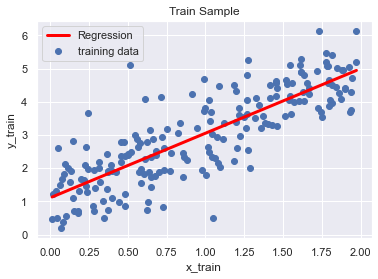

In [13]:
# Generating the synthetic data

np.random.seed(42)

n_train = 200

def create_data(n_train, sigma=0.8):
    # sample the 1st coordinate uniformaly
    x_train = np.random.uniform(low=0.0, high=2.0, size=n_train)
    x_train = np.sort(x_train)
    # additive gaussian noise
    noise_train = sigma*np.random.randn(n_train)
    # add affine function
    a , b = 2, 1
    y_train = a*x_train + b + noise_train
    # concatenante the 2D data
    data_train = (x_train, y_train)
    
    return data_train

(x_train, y_train)= create_data(n_train)

# Plotting the data and the regression line (using polyfit)

a, b = np.polyfit(x_train, y_train, 1)

plt.scatter(x_train, y_train, label='training data')
plt.plot(x_train, a*x_train+b, color='red', linewidth=3, label='Regression')
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':100})
plt.title('Train Sample')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

Q.14 Use GD to estimate the regression line.

In [14]:
# Building the model
m = 0
c = 0

L = 0.03  
epochs = 1000  

n = float(len(x_train)) 

# Performing Gradient Descent

def gradient_descent(epochs, m = 0, c = 0):
    for i in range(epochs): 
        Y_pred = m*x_train + c  
        D_m = (-2/n) * sum(x_train * (y_train - Y_pred))  
        D_c = (-2/n) * sum(y_train - Y_pred)  
        m = m - L * D_m  
        c = c - L * D_c  
    return m, c

In [15]:
m, c = gradient_descent(1000)
print(m, c)

1.9425846315733866 1.1095130303669567


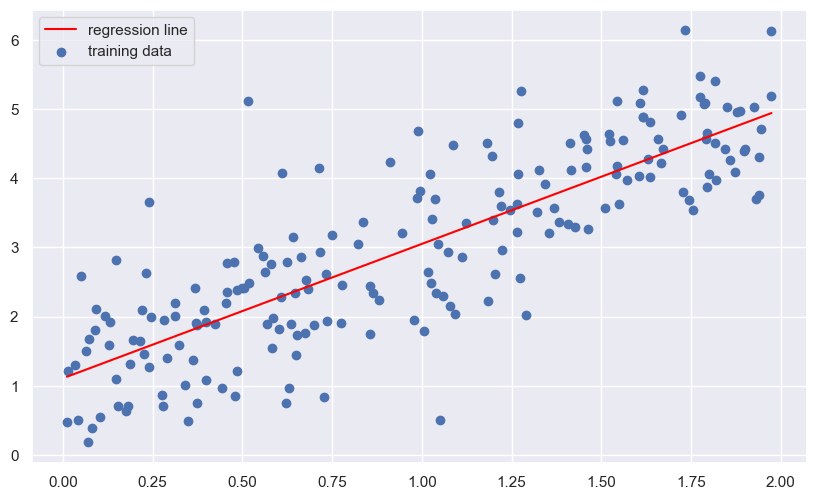

In [16]:
# Making predictions
Y_pred = m*x_train + c

plt.scatter(x_train, y_train, label='training data') 
plt.plot([min(x_train), max(x_train)], [min(Y_pred), max(Y_pred)], color='red', label='regression line')  # regression line
plt.legend()
plt.show();

Q15 Estimate the convergence rate of the gradient descent algorithm.

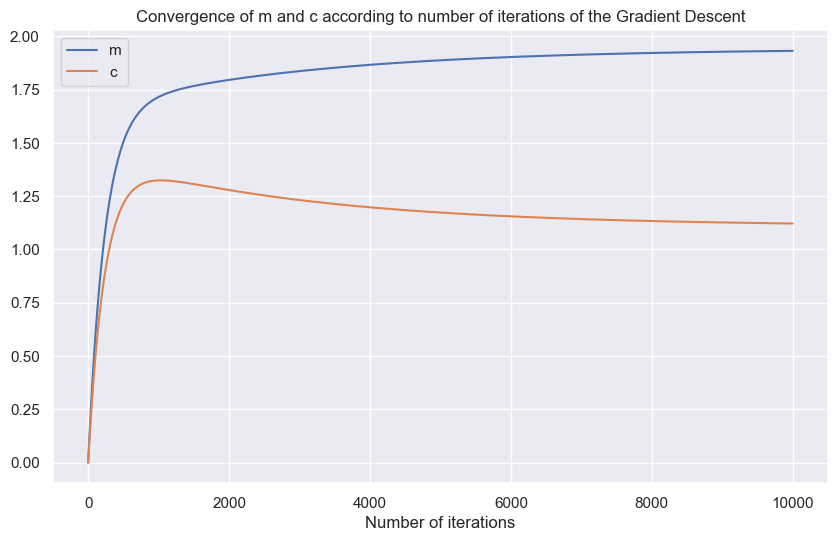

In [17]:
def gradient_descent_2(m0, c0, l_rate, n_iter, epsilon):
    m, c = m0, c0
    M, C = [m], [c]
    r = list()
    for i in range(n_iter):
        y_pred = m*x_train + c
        d_m = (-2/len(x_train)) * sum(x_train * (y_train - y_pred))  
        d_c = (-2/len(x_train)) * sum(y_train - y_pred)  
        m = m - l_rate * d_m
        c = c - l_rate * d_c
        M.append(m)
        C.append(c)
        
        if (abs(M[-1] - M[-2]) <= epsilon) and (abs(C[-1] - C[-2]) <= epsilon):
            r.append(i)
            
    return M, C, r[0]

M, C, _ = gradient_descent_2(m0=0, c0=0, l_rate=0.001, n_iter=10000, epsilon=1e-4)

plt.plot(M, label='m')
plt.plot(C, label='c')
plt.title("Convergence of m and c according to number of iterations of the Gradient Descent")
plt.xlabel("Number of iterations")
plt.legend()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


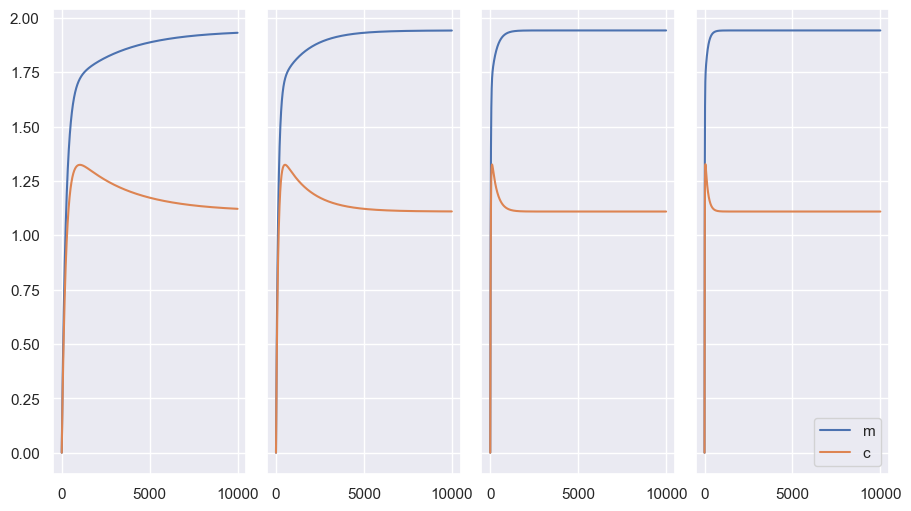

In [18]:
# Assessing convergence for different learning rate 

fig, axes = plt.subplots(1,4,sharey = True, constrained_layout = True, figsize = (9,5))
learning_rates = [0.001, 0.002, 0.01, 0.02]
for learning_rate, ax in zip(learning_rates, axes):
    ax.plot(gradient_descent_2(0,0,learning_rate,10000,1e-4)[0], label='m')
    ax.plot(gradient_descent_2(0,0,learning_rate,10000,1e-4)[1], label='c')
    plt.legend()

In [19]:
# Assessing the convergence for different tolerance levels 

for eps in [1e-2, 1e-3, 1e-4]:
    _, _, r = gradient_descent_2(m0=0, c0=0, l_rate=0.001, n_iter=10000, epsilon=eps)
    print(f"For epsilon equal to {eps}, number of iterations before reaching convergence is {r}")

For epsilon equal to 0.01, number of iterations before reaching convergence is 0
For epsilon equal to 0.001, number of iterations before reaching convergence is 479
For epsilon equal to 0.0001, number of iterations before reaching convergence is 1227


Q14 Apply random batch SGD for this regression problem:
$$
w_{n+1} = w_n - \eta \nabla E_{I_{n+1}}(w_n) \, ,
$$
where $(I_n)_n$ is a sequence of iid random variables uniform on $\{1,\ldots,N\}$.

In [28]:
n_iter = 1000

def cal_error(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def stochastic_gradient_descent(X,y,theta,learning_rate=0.04,iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    a_history = np.zeros(iterations)
    b_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_error(theta,X_i,y_i)
        cost_history[it]  = cost
        b_history[it] = theta[0]
        a_history[it] = theta[1]
        
    return a_history, b_history, cost_history

NameError: name 'a_history' is not defined

Q15. Show that the SGD iterates do not converge.

In [21]:
(x_train, y_train) = create_data(1000, 10)
x_train = np.c_[np.ones((len(x_train),1)),x_train]
            
A, B, cost_history = stochastic_gradient_descent(x_train,y_train,theta = np.random.randn(2,1))

No handles with labels found to put in legend.


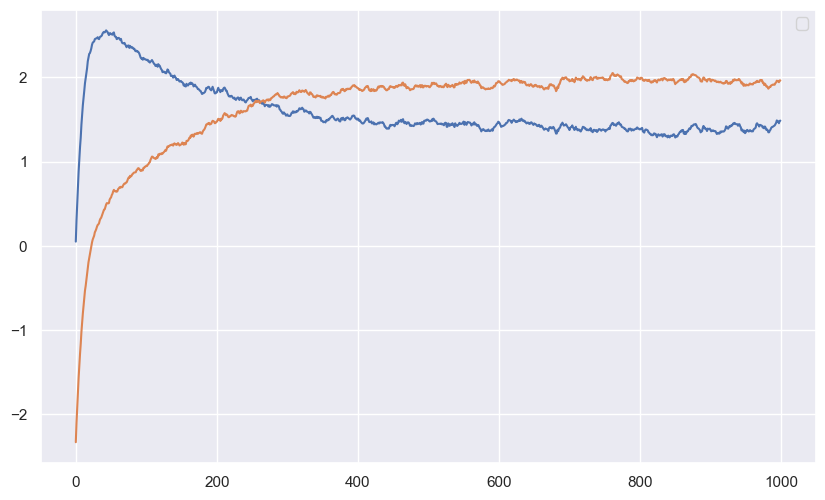

In [22]:
plt.plot(A)
plt.plot(B)
plt.legend();

Q16. (Optional) Show that when the SGD iterates seem to be stabilize, they stay in a neighborhood with length which decreases linearly with the learning rate.